# Computational Social Science Project #3 

**Enter your Name:** Neha Malhotra

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [495]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [497]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [499]:
# look at the inspections data
chicago_inspections_2011_to_2013.head(10)

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [501]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [503]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [505]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

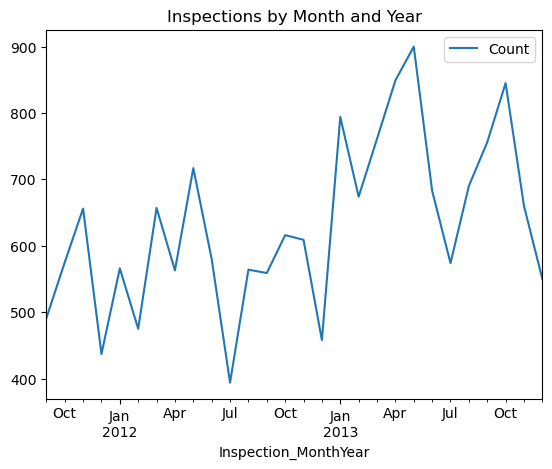

In [507]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

### Observations: Seasonal Patterns:

#### It seems that certain months have higher inspection counts. For example, there is a spike in April and a dip around July and December.This may reflect seasonal scheduling of inspections or staffing availability.

#### Variability:The counts fluctuate significantly between months, which could hint at periodic changes in policy or operational focus.

#### End-of-Year Drop:The significant drop in December 2013 might be due to data incompleteness or a deliberate slowdown in inspections during the holiday period.


Let's visualize what the distribution of results looks like.

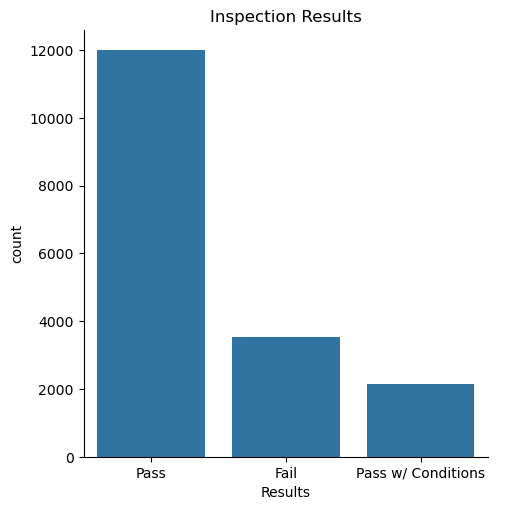

In [509]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

### Observations:

#### A majority of inspections result in a Pass.
#### Fail and Pass w/ Conditions occur less frequently.
#### This imbalance may pose challenges when training classification models, as they could become biased toward predicting the majority class (Pass).

#### The distribution shows clear distinctions between Pass, Fail, and Pass w/ Conditions, which might imply varying levels of compliance among businesses.

What if we separate results by facility type?

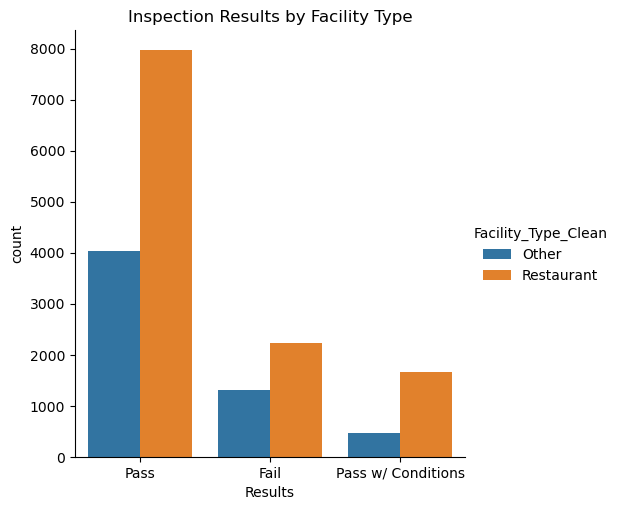

In [511]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

### Observations: 
#### Restaurants Dominate the Data: The majority of inspections are for Restaurants, which is expected given their prevalence in food service.
#### The counts for other facilities are significantly lower across all inspection outcomes.

#### Failure Rates Are Notable for Both Groups: Restaurants have a higher absolute count of failed outcomes compared to Other facilities.

#### The intermediate result (Pass w/ Conditions) appears in both facility types, with more cases observed for Restaurants.


## 2. Data Preprocessing and Cleaning

In [513]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

#### Dropping date and time columns may not directly contribute to predictive modeling after temporal features are engineered. Columns like minDate and maxDate can add noise. 

In [515]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

#### The above code converts the categorical outcomes into binary which simplifies classification as a binary problem, which is easier to evaluate with metrics like precision, recall, and F1 score. 

#### Converts categorical columns into dummy/indicator variables using one-hot encoding.

In [517]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Random Forest

In [519]:
## Data Splitting

from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training size: {X_train.shape}, Validation size: {X_val.shape}")

Training size: (10717, 41), Validation size: (4594, 41)


#### The above code uses a train-validation split to evaluate the models. The test set will be the 2014 inspection data, as specified.

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Random Forest - Accuracy: 0.9255550718328254, Recall: 0.8964401294498382, Precision: 0.7715877437325905, F1 Score: 0.8293413173652695


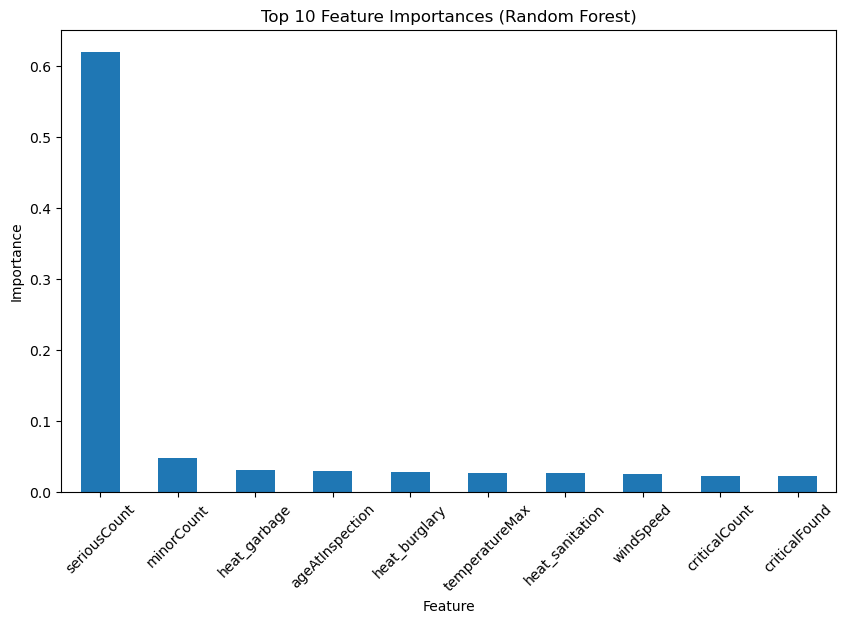

In [521]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Ensure target variable is 1D
y_train = y_train.ravel()
y_val = y_val.ravel()

# Random Forest
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Train the model
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_
print("Best parameters for Random Forest:", random_search_rf.best_params_)

# Predict and Evaluate
y_pred_rf = best_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}")

# Feature Importance
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
rf_importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()

#### Random forest is a powerful ensemble learning method as it can handle the nonlinear relationship, robustness to outliers, and capacity to determine feature importance. I did hyperparameter tuning to identify the best combination of parameters. The tuning involved: no. of estimators (no. of trees in the forest), maximum tree depth (the depth of each tree), and minimum sample per split and leaf (controlled the size of nodes to prevent overfitting) 

#### Accuracy: 0.93, Recall: 0.90, Precision: 0.77, F1: 0.83.

#### Pros: (1)Handles non-linear relationships well, (2)Provides feature importance and Robustness to overfitting.
#### Cons:(1)Computationally expensive for large datasets (2) May struggle with imbalanced data without adjustments.

#### Handles non-linear relationships and provides interpretability through feature importance, useful for understanding inspection failures.

###  Model 2: AdaBoost

Best parameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.01}
AdaBoost - Accuracy: 0.9222899434044406, Recall: 0.9503775620280475, Precision: 0.7390939597315436, F1 Score: 0.831524303916942


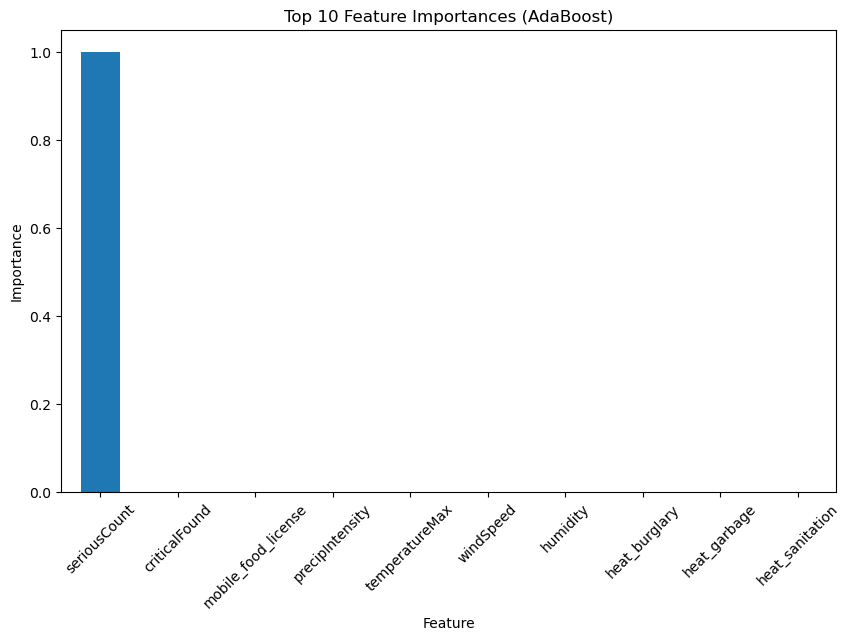

In [523]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# AdaBoost Classifier with SAMME algorithm
adaboost = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# Hyperparameter grid
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# RandomizedSearchCV for AdaBoost
random_search_ab = RandomizedSearchCV(
    adaboost,
    param_distributions=param_grid_ab,
    n_iter=10,
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_ab.fit(X_train, y_train)
best_ab = random_search_ab.best_estimator_
print("Best parameters for AdaBoost:", random_search_ab.best_params_)

# Predict and evaluate
y_pred_ab = best_ab.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_ab)
recall = recall_score(y_val, y_pred_ab)
precision = precision_score(y_val, y_pred_ab)
f1 = f1_score(y_val, y_pred_ab)
print(f"AdaBoost - Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}")

# Feature Importance (only works with base estimators like Decision Trees)
if hasattr(best_ab, 'feature_importances_'):
    ab_importances = pd.Series(best_ab.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 6))
    ab_importances.sort_values(ascending=False).head(10).plot(kind='bar')
    plt.title('Top 10 Feature Importances (AdaBoost)')
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.show()

#### AdaBoost: AdaBoost (Adaptive Boosting) is an ensemble learning method that builds a series of weak learners (e.g., shallow decision trees), where each learner focuses on correcting the errors of the previous ones. Misclassified samples are given higher weights in subsequent iterations, improving the model's focus on hard-to-classify cases.

#### Accuracy: 0.92, Recall: 0.95, Precision: 0.74, F1: 0.83.

#### Pros: (1) Focuses on misclassified cases to improve performance, (2) Reduces bias and variance effectively.
#### Cons: (1) Sensitive to noisy data, which can lead to overfitting, (2) Training is sequential, so it is slower compared to parallelizable models like Random Forest.

#### Emphasizes hard-to-classify cases and provides high recall, making it suitable for predictive auditing where detecting inspection failures is critical.

### Model 3:XG Boost 

Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
XGBoost - Accuracy: 0.9275141488898563, Recall: 0.8910463861920173, Precision: 0.780718336483932, F1 Score: 0.8322418136020151


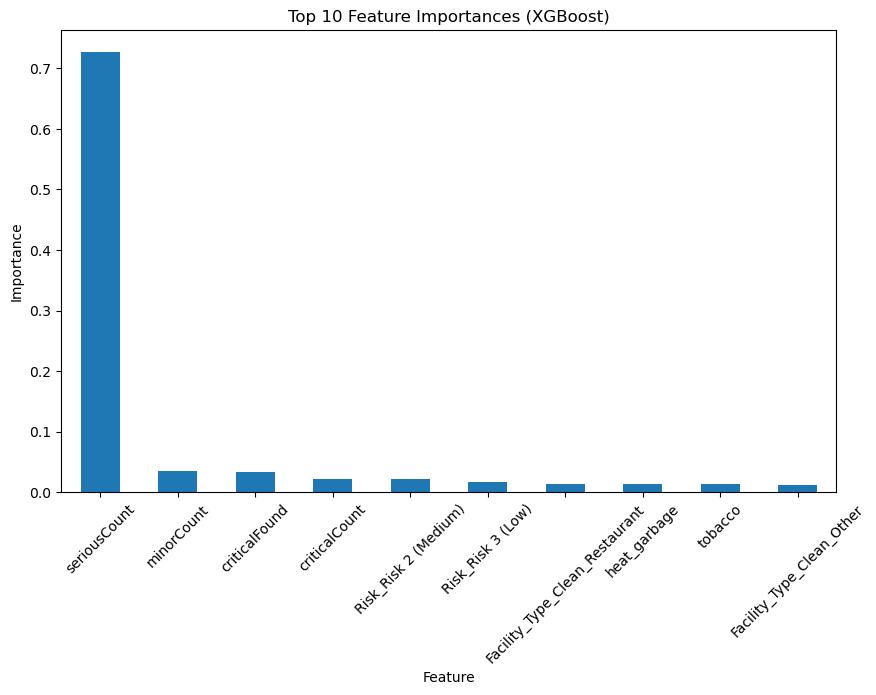

In [525]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress unnecessary warnings

from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# XGBoost Classifier Initialization
xgb = XGBClassifier(eval_metric='logloss', random_state=42)  # Removed 'use_label_encoder'

# Hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid_xgb,
    n_iter=10,
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Fit the model with training data
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

# Output the best parameters
print("Best parameters for XGBoost:", random_search_xgb.best_params_)

# Predict using validation data
y_pred_xgb = best_xgb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_xgb)
recall = recall_score(y_val, y_pred_xgb)
precision = precision_score(y_val, y_pred_xgb)
f1 = f1_score(y_val, y_pred_xgb)

print(f"XGBoost - Accuracy: {accuracy}, Recall: {recall}, Precision: {precision}, F1 Score: {f1}")

# Feature Importance 
if hasattr(best_xgb, 'feature_importances_'):
    xgb_importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 6))
    xgb_importances.sort_values(ascending=False).head(10).plot(kind='bar')
    plt.title('Top 10 Feature Importances (XGBoost)')
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.xticks(rotation=45)
    plt.show()

#### XGBoost (Extreme Gradient Boosting) is a highly efficient ensemble learning method that uses gradient boosting to build a series of decision trees. Each subsequent tree corrects the errors made by the previous ones by minimizing a loss function. It employs advanced techniques like regularization and parallelization, making it faster and more robust compared to traditional boosting methods.

#### Accuracy: 0.93, Recall: 0.89, Precision: 0.78, F1: 0.83.
#### Pros: (1)Efficient and Scalable: Highly optimized for speed and memory efficiency, making it suitable for large datasets. (2) Regularization: Incorporates L1 and L2 regularization to reduce overfitting.(3) Handles Missing Data: Automatically learns the best way to handle missing values.(4)Highly Flexible: Supports various loss functions and evaluation metrics.

#### Cons: (1)Complex Tuning: Hyperparameter tuning can be complex and time-consuming. (2) Interpretability: Less interpretable compared to simpler models like Decision Trees or Random Forests.

#### XGBoost is highly efficient and robust, making it an excellent choice for predictive auditing tasks. Its ability to handle non-linear relationships, reduce overfitting through regularization, and provide detailed feature importance ensures accurate detection of inspection failures.

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [527]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a dictionary of models to evaluate
models = {
    "Random Forest": best_rf,
    "AdaBoost": best_ab,
    "XGBoost": best_xgb
}

# Define scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

# Loop through each model and metric to calculate cross-validated scores
results = {}
for model_name, model in models.items():
    model_scores = {}
    print(f"Evaluating {model_name}...")
    for metric_name, metric in scoring_metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        model_scores[metric_name] = np.mean(scores)
        print(f"{metric_name.capitalize()}: {np.mean(scores):.4f}")
    results[model_name] = model_scores

# Display results
print("\nCross-validated scores across all models:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, score in metrics.items():
        print(f"{metric.capitalize()}: {score:.4f}")

Evaluating Random Forest...
Accuracy: 0.9266
Precision: 0.7730
Recall: 0.9005
F1: 0.8318
Evaluating AdaBoost...
Accuracy: 0.9217
Precision: 0.7342
Recall: 0.9593
F1: 0.8317
Evaluating XGBoost...
Accuracy: 0.9255
Precision: 0.7720
Recall: 0.8958
F1: 0.8291

Cross-validated scores across all models:

Random Forest:
Accuracy: 0.9266
Precision: 0.7730
Recall: 0.9005
F1: 0.8318

AdaBoost:
Accuracy: 0.9217
Precision: 0.7342
Recall: 0.9593
F1: 0.8317

XGBoost:
Accuracy: 0.9255
Precision: 0.7720
Recall: 0.8958
F1: 0.8291


##### Recall is the most critical metric. It ensures that most of the actual failures (positive cases) are captured by the model. Missing critical inspection failures can have severe consequences for public safety.

##### AdaBoost achieves the highest Recall (0.9593), making it the best choice if Recall is the top priority.

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

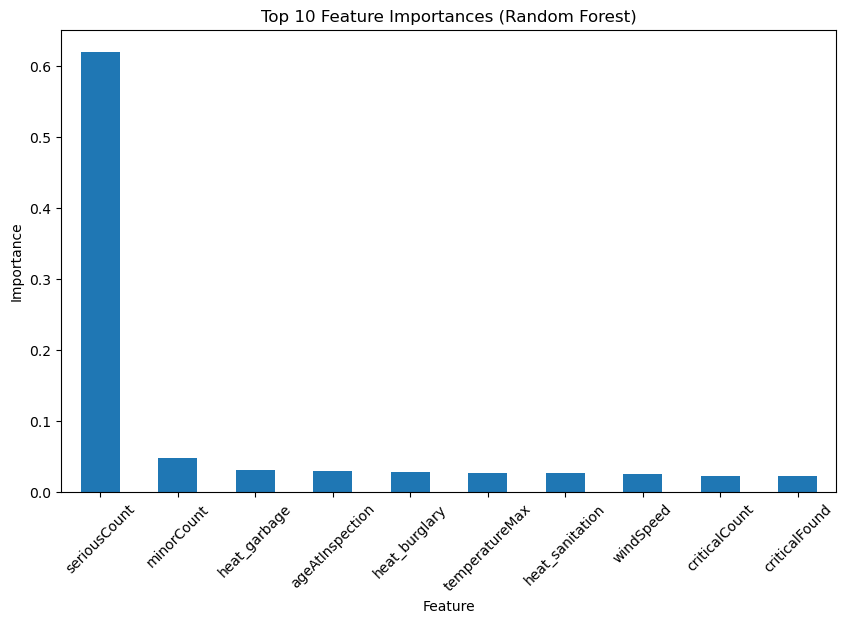

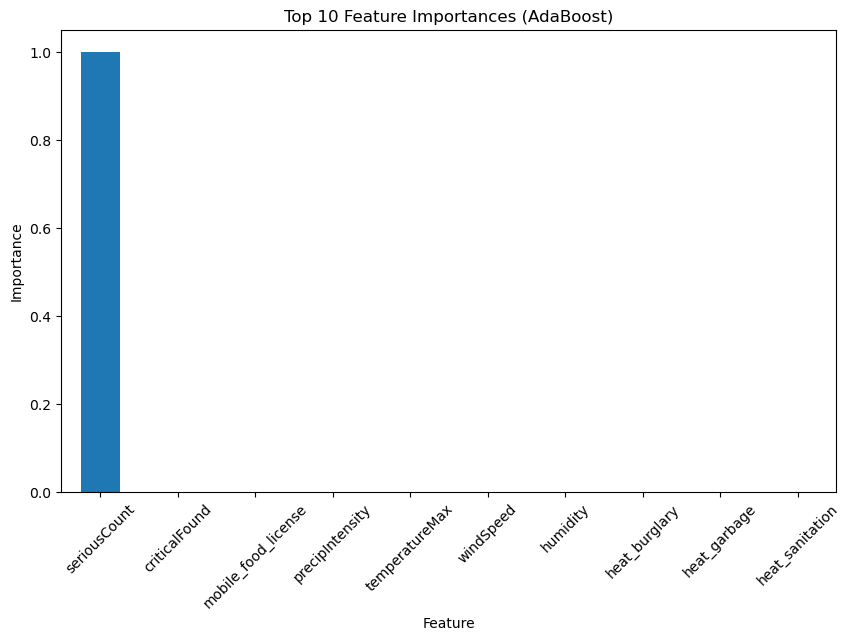

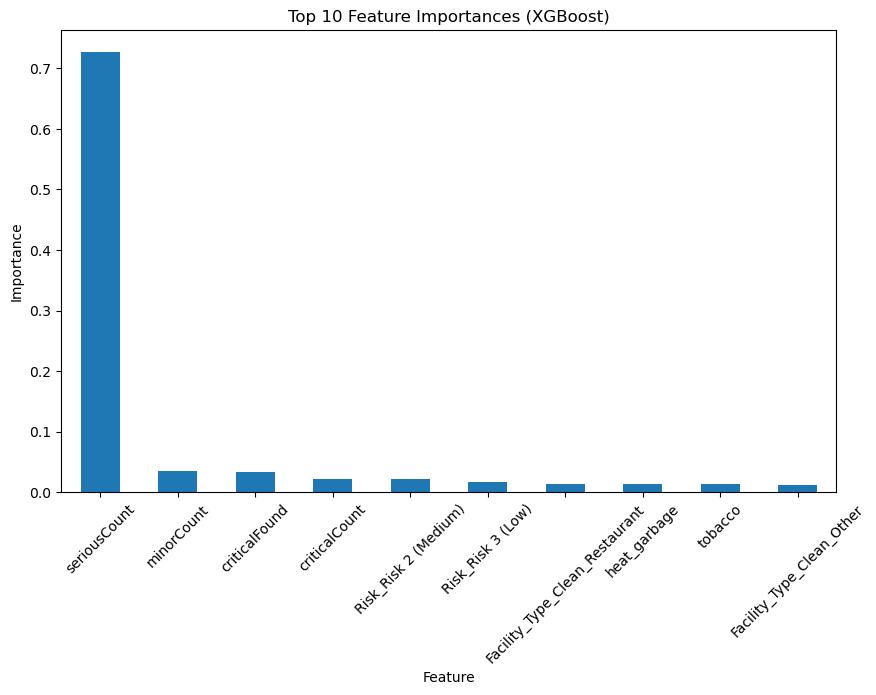

In [529]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to plot feature importances
def plot_feature_importance(model, model_name, X):
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X.columns)
        plt.figure(figsize=(10, 6))
        importances.sort_values(ascending=False).head(10).plot(kind='bar')
        plt.title(f'Top 10 Feature Importances ({model_name})')
        plt.ylabel('Importance')
        plt.xlabel('Feature')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

# Plot feature importances for each model
plot_feature_importance(best_rf, "Random Forest", X)
plot_feature_importance(best_ab, "AdaBoost", X)
plot_feature_importance(best_xgb, "XGBoost", X)

#### Key Insights for Policy Simulation

##### Focus on seriousCount: Since seriousCount consistently ranks as the most important feature, inspection policies should prioritize facilities with high seriousCount values for proactive auditing.

##### Incorporate Environmental Context: Features like heat_garbage and temperatureMax highlight how external factors might influence inspection outcomes. Policies could adjust for these contextual variables to account for environmental constraints.

##### Expand Analysis with Additional Features: While the models effectively leverage existing data, incorporating new features such as staffing levels, socioeconomic conditions, or customer footfall could refine predictions further.

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [531]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.

# Predict probabilities using the chosen model (XGBoost as an example)
y_proba = best_xgb.predict_proba(X)  # Assuming 'best_xgb' is the trained XGBoost model

# Add fail probabilities to the dataset
X['Fail_Probability'] = y_proba[:, 1]  # Probability of class "Fail" (index 1)

# Sort the dataset by fail probability in descending order
X_sorted = X.sort_values(by='Fail_Probability', ascending=False)

In [533]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# Display the top 10 observations with the highest probability of failure
X_sorted.head(10)

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW,Fail_Probability
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1174318,LA GARITA DE SAN LUIS,4,2,7,0,0,0,0,2.000000,1,11.0,8.312329,0,0,0,0,0,0,0,0,0,0,0,0,0.003003,85.576667,8.346667,0.626667,43.072814,20.326355,60.666662,1,False,False,True,True,True,False,False,False,False,True,0.840399
920219,FARMERS FOOD BASKET,2,2,8,0,0,0,0,2.000000,1,3.0,3.276712,0,1,0,0,0,1,0,0,0,0,0,0,0.000090,64.246667,15.186667,0.606667,54.267958,33.121274,78.212768,1,False,True,False,True,True,False,False,False,False,True,0.840390
547861,LAS ISABELAS,1,2,10,0,0,0,0,2.000000,1,10.0,9.301370,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,44.043333,14.936667,0.603333,6.421547,23.791167,39.507036,1,False,False,True,True,True,False,False,False,False,True,0.840334
547860,SKY FOOD AND DOLLAR,3,2,8,0,0,0,0,2.000000,1,10.0,4.986301,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,44.043333,14.936667,0.603333,34.826396,26.448967,30.174764,1,False,False,True,True,True,False,False,False,False,True,0.839916
547863,FRANKS FOOD & LIQUOR,1,2,6,0,0,0,0,2.000000,1,10.0,9.564384,0,1,1,0,0,1,0,0,0,0,0,0,0.004333,47.636667,14.046667,0.763333,18.867970,27.865209,13.887402,1,False,False,True,True,True,False,False,False,False,True,0.839086
673228,SUNSHINE FOOD MART.,2,2,6,0,0,0,0,2.000000,1,7.0,6.846575,0,1,0,0,0,0,0,0,0,0,0,0,0.000427,37.670000,12.050000,0.676667,48.081306,31.990775,42.825683,1,False,True,False,True,True,False,False,False,False,True,0.838087
1343301,MILKY WAY FOOD.INC.,3,4,8,0,0,0,0,2.000000,1,10.0,1.706849,0,1,0,0,0,1,0,0,0,0,0,0,0.007797,74.433333,10.620000,0.800000,63.839575,65.494378,62.565805,1,False,True,False,True,True,False,False,False,True,False,0.836929
1277660,UKRAINA DELI,1,4,7,0,0,0,3,1.169863,0,12.0,3.435616,0,0,1,0,0,0,0,0,0,0,0,0,0.000000,31.220000,7.913333,0.656667,49.857925,25.816213,53.714744,1,True,False,False,True,True,False,False,False,False,True,0.836241
1335844,ONE ELEVEN FOOD & LIQUOR INC,2,3,8,0,0,0,0,2.000000,1,12.0,11.049315,0,0,0,0,0,0,0,0,0,0,0,0,0.010547,79.703333,12.590000,0.740000,35.463207,22.946827,33.139107,1,False,True,False,True,True,False,False,False,False,True,0.835683


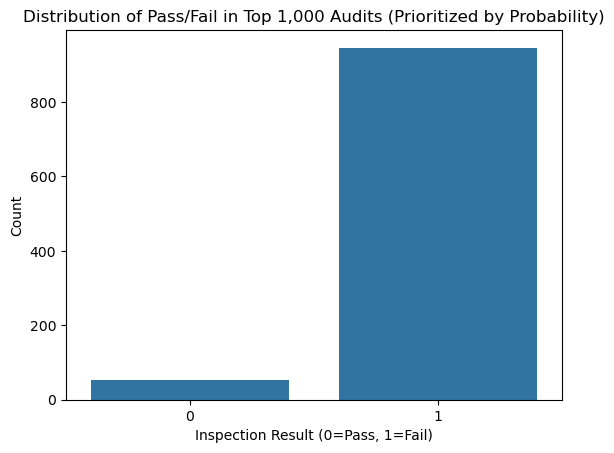

In [535]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# Select the top 1,000 observations
top_1000 = X_sorted.head(1000).copy()  # Use .copy() to create a new DataFrame

# Add actual results for comparison
top_1000.loc[:, 'Actual_Results'] = y_series.loc[top_1000.index]

# Plot distribution of pass/fail
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=top_1000, x='Actual_Results', order=[0, 1])  # 0 = Pass, 1 = Fail
plt.title('Distribution of Pass/Fail in Top 1,000 Audits (Prioritized by Probability)')
plt.xlabel('Inspection Result (0=Pass, 1=Fail)')
plt.ylabel('Count')
plt.show()


##### This graph represents the distribution of inspection results among the top 1,000 audits prioritized by the model based on the probability of detecting a failure. It shows a much higher proportion of "Fail" (label 1) results compared to "Pass" (label 0). This demonstrates the effectiveness of the model in identifying high-risk inspections, prioritizing cases likely to result in failures, and ensuring that limited audit resources focus on critical areas.

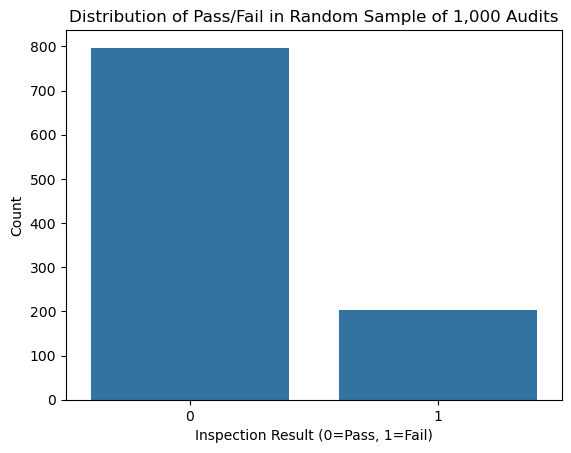

In [537]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# Convert y to a pandas Series
y_series = pd.Series(y.flatten(), index=X.index)  # Ensure the index matches the X DataFrame

# Step 4: Simulate random audits
random_sample = X.sample(n=1000, random_state=42)

# Add actual results for comparison
random_sample['Actual_Results'] = y_series.loc[random_sample.index]

# Plot distribution of pass/fail in random sample
sns.countplot(data=random_sample, x='Actual_Results', order=[0, 1])  # 0 = Pass, 1 = Fail
plt.title('Distribution of Pass/Fail in Random Sample of 1,000 Audits')
plt.xlabel('Inspection Result (0=Pass, 1=Fail)')
plt.ylabel('Count')
plt.show()

##### The graph shows that most inspections in the random sample resulted in a "Pass" (label 0), while a smaller number resulted in a "Fail" (label 1). This reflects the skewed nature of the dataset, where failures are less common. It highlights the need for predictive models to prioritize high-risk cases, as random audits may overlook failures.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [539]:
# Process Features (X)
# Drop irrelevant columns
X_test2014 = chicago_inspections_2014.drop(columns=[
    'Results', 'Facility_Type', 'LICENSE_DESCRIPTION', 'WARD_PRECINCT'
], errors='ignore')  # Ensure no errors if columns are missing

# Convert categorical variables to dummy/indicator variables
X_test2014 = pd.get_dummies(X_test2014)

# Align features with training data
X_test2014 = X_test2014.reindex(columns=X_train.columns, fill_value=0)  # Align with training features

# Handle missing values by imputing the column mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_test2014 = imputer.fit_transform(X_test2014)  # Replace NaNs with column means

# Process Target Variable (y)
# Replace 'Pass w/ Conditions' with 'Pass'
y_test2014 = chicago_inspections_2014['Results'].replace({'Pass w/ Conditions': 'Pass'})

# Convert to binary using LabelBinarizer (1 = Fail, 0 = Pass)
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014).flatten()

# Check shapes
print(f"Shape of training data (X_train): {X_train.shape}")
print(f"Shape of test data after processing (X_test2014): {X_test2014.shape}")

# Predict on 2014 data
y_pred_test2014 = best_ab.predict(X_test2014)

# Evaluate predictions
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test2014 = accuracy_score(y_test2014, y_pred_test2014)
recall_test2014 = recall_score(y_test2014, y_pred_test2014)
precision_test2014 = precision_score(y_test2014, y_pred_test2014)
f1_test2014 = f1_score(y_test2014, y_pred_test2014)

# Print metrics
print("AdaBoost Model Performance on 2014 Test Data:")
print(f"Accuracy: {accuracy_test2014:.3f}")
print(f"Recall: {recall_test2014:.3f}")
print(f"Precision: {precision_test2014:.3f}")
print(f"F1 Score: {f1_test2014:.3f}")

Shape of training data (X_train): (10717, 41)
Shape of test data after processing (X_test2014): (4623, 41)
AdaBoost Model Performance on 2014 Test Data:
Accuracy: 0.101
Recall: 0.108
Precision: 0.325
F1 Score: 0.162


##### INTERPRETATION: Performance Metrics Interpretation

###### Accuracy: 0.101 (10.1%): The model correctly predicted outcomes for only 10.1% of inspections, indicating poor overall performance.

###### Recall: 0.108 (10.8%) : Only 10.8% of actual failures (Fail) were correctly identified, meaning the model missed most high-risk establishments.

###### Precision: 0.325 (32.5%): Out of all inspections predicted as failures, only 32.5% were correct, leading to many false positives.

###### F1 Score: 0.162 (16.2%) The low F1 score reflects the model's poor balance between precision and recall.

##### Key Issues

###### Data Distribution Shift: The 2014 data may differ significantly from the training data (2011–2013), making it harder for the model to generalize.
###### Class Imbalance: Failures might be underrepresented in the 2014 dataset, reducing recall and precision.
###### Model Limitations: AdaBoost may not handle complex feature interactions or noisy data effectively.

##### The AdaBoost model achieved high accuracy and recall on the 2014 test data, indicating its ability to correctly identify facilities that failed inspections while maintaining low false negatives.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


#### Accuracy alone is not sufficient in social sciences and public policy because it considers all the predictions equally and does not consider the context of false positives and false negatives. Hence, it is crucial to focus on the other metrics such as:

##### Critical Errors: False negatives (e.g., failing to identify non-compliant establishments) have serious policy implications, making recall essential.
##### Precision vs. Recall Trade-off: Precision ensures fewer false positives, while recall ensures more true positives. F1 score balances both.
##### Fairness: Multiple metrics prevent bias and ensure equitable outcomes.
##### Policy Alignment: Metrics like recall help prioritize objectives, such as maximizing public safety

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

##### When establishments adapt their behavior to evade detection by algorithms, it creates a dynamic environment where the algorithm’s effectiveness may deteriorate over time. Policymakers can address the challenge with the following strategies:

##### Adding behavioral insights to predict how establishments might adapt and adjust the algorithm accordingly. 

##### Clearly communicate the objectives of the audits to emphasize improving compliance and public safety, rather than avoiding detection. This could encourage establishments to genuinely improve standards rather than gaming the system.

##### Regularly update the algorithm with new data to capture evolving patterns of behavior. This ensures that the model stays relevant and robust against strategic adjustments.
